# Лабораторна робота 3 (1 частина)

Романенко Ілля ФІТ 4-7

23 варіант

In [1430]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## Крок 1

Завантажуємо датасет diabetes dataset, та виведемо перші 5 рядків

In [1431]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X, y = data.data, data.target

dataFrame = pd.DataFrame(X, columns=data.feature_names)
dataFrame['target'] = y

dataFrame.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Крок 2

Перевіримо наявність пропусків

In [1432]:
dataFrame.isna().sum().sum()

0

## Крок 3

Перевіримо наявність дублікатів

In [1433]:
dataFrame.duplicated().sum()

0

## Крок 4

In [1434]:
print('типи даних по колонках:\n',  dataFrame.dtypes)

типи даних по колонках:
 age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


## Крок 5

Замінимо бінарні ознаки статі на 1 та 0

In [1435]:
uniqueSex = dataFrame['sex'].unique()
print(uniqueSex)

[ 0.05068012 -0.04464164]


In [1436]:
# таким чином ми замніюємо значення 0.05068012 на 1, а -0.04464164 на 0 
# метод .replace() тут не спрацював
dataFrame['sex'] = (dataFrame['sex'] > 0).astype(int)

dataFrame.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,1,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Перевіримо унікальні значення в стопвчику вік

In [1437]:
uniqueAges = dataFrame['age'].unique()
print(uniqueAges)

[ 0.03807591 -0.00188202  0.08529891 -0.08906294  0.00538306 -0.09269548
 -0.04547248  0.06350368  0.04170844 -0.07090025 -0.09632802  0.02717829
  0.01628068  0.04534098 -0.05273755 -0.00551455  0.07076875 -0.0382074
 -0.02730979 -0.04910502 -0.0854304  -0.06363517 -0.06726771 -0.10722563
 -0.02367725  0.05260606  0.06713621 -0.06000263  0.03444337  0.03081083
  0.04897352  0.01264814 -0.00914709 -0.09996055  0.01991321 -0.05637009
 -0.07816532 -0.04183994  0.05987114 -0.03457486 -0.03094232 -0.10359309
 -0.01641217  0.00175052 -0.02004471  0.0562386   0.02354575  0.0090156
 -0.07453279 -0.01277963 -0.08179786  0.08166637  0.11072668  0.09256398
  0.07440129  0.07803383  0.09619652  0.08893144]


Також замінимо значення віку людини на 1 та 0, відповідно до середнього медіанного значення в окремій вибірці.

In [1438]:
meanAge = dataFrame['age'].mean()
dataFrameAge = dataFrame.copy()
dataFrameAge['age'] = (dataFrameAge['age'] > meanAge).astype(int)

dataFrameAge.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,1,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,0,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,1,1,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,0,0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,1,0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Крок 6

Проаналізуємо кореляції між прогресом діабету і іншими ознаками

In [1439]:
correlationMatrix = dataFrame[['age', 'sex', 'bmi', 'bp', 'target']].corr()
print('матриця кореляцій:\n', correlationMatrix)

матриця кореляцій:
              age       sex       bmi        bp    target
age     1.000000  0.173737  0.185085  0.335428  0.187889
sex     0.173737  1.000000  0.088161  0.241010  0.043062
bmi     0.185085  0.088161  1.000000  0.395411  0.586450
bp      0.335428  0.241010  0.395411  1.000000  0.441482
target  0.187889  0.043062  0.586450  0.441482  1.000000


In [1440]:
targetСorrelation = correlationMatrix['target'].drop('target').sort_values(ascending=False)
print('\nКореляція між прогресом діабету і іншими ознаками:\n', targetСorrelation)


Кореляція між прогресом діабету і іншими ознаками:
 bmi    0.586450
bp     0.441482
age    0.187889
sex    0.043062
Name: target, dtype: float64


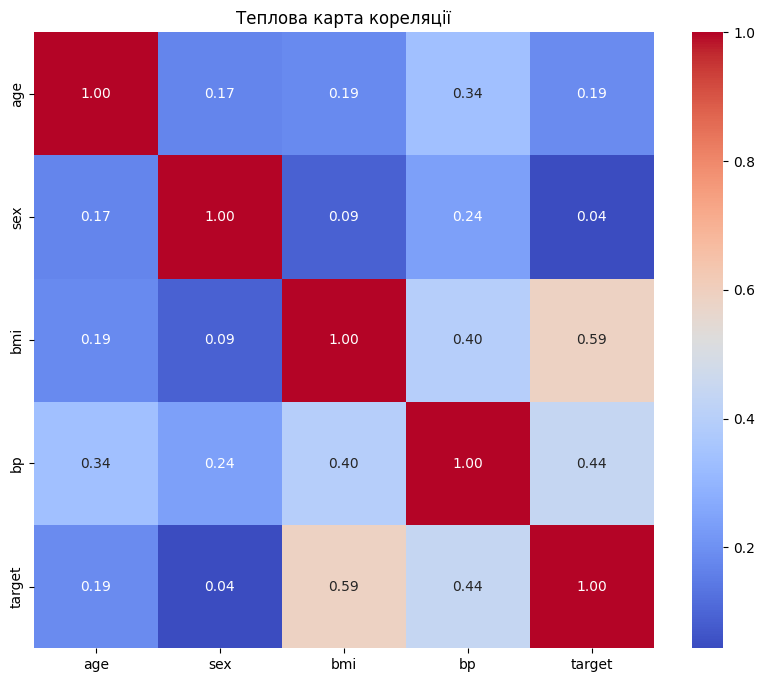

In [1441]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Теплова карта кореляції')
plt.show()

Наглядно можемо бачити, що найбільшу кореляцію з прогресом діабету, серед інших ознак пацієнта, є bmi (Індекс маси тіла). Отже можна сказати що пацієнти з підвищенним bmi мають швидший прогрес діабету. Також

## Крок 7

Масштабуємо ознаки

In [1442]:
dataFrameOriginal = dataFrame.copy()

scaledFeatures = StandardScaler().fit_transform(dataFrame.drop('target', axis=1))

dataFrame = pd.DataFrame(scaledFeatures, columns=data.feature_names)
dataFrame['target'] = y

# dataFrameS.head()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataFrame.drop('target', axis=1))

## Крок 8

Поділимо дані на тренувальну і тестову вибірку

In [1443]:


# Поділ на тренувальну і тестову вибірки (80% - тренувальні, 20% - тестові)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

print("Тренувальна вибірка:", X_train.shape)
print("Тестова вибірка:", X_test.shape)

Тренувальна вибірка: (353, 10)
Тестова вибірка: (89, 10)


## Крок 9

Побудуємо модель лінійної регресії і random forest регресії

In [1444]:
# лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# Random Forest регресія
rf_reg = RandomForestRegressor(random_state=42, n_estimators=97)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Лінійна регресія: MSE =", mse_lin, ", R2 =", r2_lin)
print("Random Forest регресія: MSE =", mse_rf, ", R2 =", r2_rf)

Лінійна регресія: MSE = 2900.1936284934823 , R2 = 0.45260276297191926
Random Forest регресія: MSE = 2944.272397572967 , R2 = 0.4442831128048915


як можемо бачити, лінійна регресія показала себе краще за рандом форест в даному випадку, хоча й помилка в 2900 в обох моделях є досить жахливим результатом

## Крок 10

побудуємо графіки

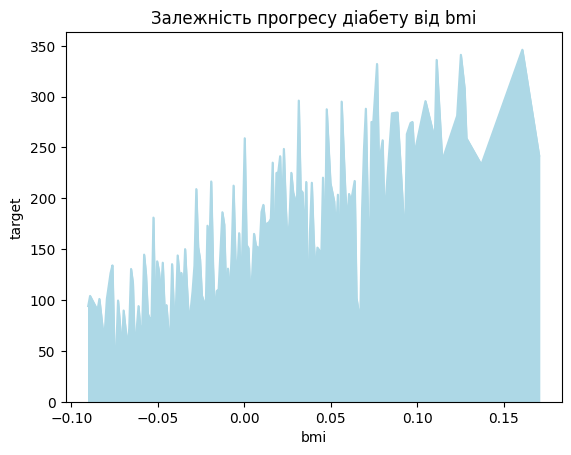

In [1445]:
diabetesTarget = dataFrameOriginal.groupby(['bmi'])['target'].mean()

fig, ax = plt.subplots()

diabetesTarget.plot(kind='area', color=['lightblue'], ax=ax)

ax.set_xlabel('bmi')
ax.set_ylabel('target')
ax.set_title('Залежність прогресу діабету від bmi')

plt.show()

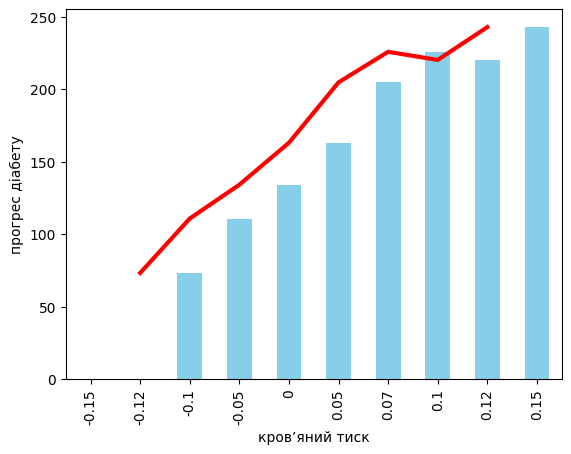

In [1446]:
bins = [-0.2, -0.15, -0.12, -0.1, -0.05, 0, 0.05, 0.08, 0.1, 0.12, 0.15]
labels = ['-0.15', '-0.12', '-0.1', '-0.05', '0', '0.05', '0.07','0.1', '0.12', '0.15']

dataFrameOriginal['TargetBP'] = pd.cut(dataFrameOriginal['bp'], bins=bins, labels=labels, right=False)

survivalRate = dataFrameOriginal.groupby('TargetBP')['target'].mean()
dataFrameOriginal = dataFrameOriginal.drop(['TargetBP'], axis=1)

fig, ax = plt.subplots()

survivalRate.plot(kind='bar', color='skyblue', ax=ax)

ax.plot(survivalRate.index[1:],
        survivalRate.values[1:], 
        color='red',
        linestyle='-',
        linewidth=3)

ax.set_xlabel('кров’яний тиск')
ax.set_ylabel('прогрес діабету')

plt.show()

## Висновки

- найбільшими кореляційними ознаками розвитку діабету є bmi(індекс маси тіла), та bp(тиск крові), стать та вік вплиають на цей показник досить слабко

- значення розвитку діабету, статистично лінійно збільшується відносно збільшення параметрів bmi і bp,

- лінійна регресивна модель показала себе краще за модель random forest